# 보고서 개요: 마케팅 데이터 분석 및 시각화
### 1. 보고서 제목
“다양한 광고 채널의 마케팅 성과 분석 및 시각화”

### 2. 보고서 목적
AppsFlyer, Apple AdChannel, Moloco AdChannel, Twitter AdChannel에서 수집한 데이터를 바탕으로 광고 성과를 종합적으로 분석.

주요 성과 지표(KPI) 도출 및 시각화를 통해 광고 캠페인 최적화 방안에 대해 생각해볼 수 있다.


% 해당 데이터는 국내 한 버거집의 온라인 데이터 입니다 %


광고 채널별 주요 성과 지표 비교:
유입 사용자 수: 채널별 유입 비중 분석.
전환율(CTR, CVR): 광고 노출 대비 성과 비교.
ROI & LTV: 투자 대비 가치 평가.

# 데이터 로딩 및 확인

- 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- pandas import

In [2]:
import pandas as pd

- 데이터 불러오기 및 확인

In [3]:
appsflyer_df = pd.read_csv('drive/MyDrive/metric/Data/appsflyer_origin.csv')
appsflyer_df.head()

<ipython-input-3-05474cc22d09>:1: DtypeWarning: Columns (5,6,12,13,14,15,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  appsflyer_df = pd.read_csv('drive/MyDrive/metric/Data/appsflyer_origin.csv')


,Install Time,Event Time,Event Name,Event Value,Event Revenue,Media Source,Channel,Campaign ID,Adset ID,Ad ID,AppsFlyer ID,Customer User ID,Android ID,Advertising ID,IDFA,IDFV,Platform,Original URL,Keywords
0,2023-01-10 23:49:20,2023-01-10 23:49:20,install,NaN,NaN,naver,brandsearch_event_list,NaN,NaN,NaN,1673362141929-3339631,NaN,NaN,NaN,13B95E3C-4192-432E-9482-60CF264BC24C,3339C631-9C60-494F-942E-C1ECD13E8D7E,ios,https://burgerkingkor.onelink.me/U3PL?af_web_d...,NaN
1,2023-01-10 23:35:35,2023-01-10 23:35:35,install,NaN,NaN,af_banner,af_web_banner,NaN,NaN,NaN,1673359801656-1122519,NaN,NaN,NaN,NaN,11B22BEE-519B-4318-AF52-4FAF1944564D,ios,https://burgerkingkor.onelink.me/U3PL?creative...,NaN
2,2023-01-10 23:31:38,2023-01-10 23:31:38,install,NaN,NaN,naver,brandsearch_event_list,NaN,NaN,NaN,1673361091980-5421197,NaN,NaN,NaN,NaN,F5C4A211-9739-4843-996A-F633B6DB2546,ios,https://burgerkingkor.onelink.me/U3PL?af_web_d...,NaN
3,2023-01-10 23:30:38,2023-01-10 23:30:38,install,NaN,NaN,naver,brandsearch_main_image,NaN,NaN,NaN,1673361002380-2027655,NaN,NaN,NaN,NaN,20A2C76F-55DF-4386-87A0-BD16DEE441C6,ios,https://burgerkingkor.onelink.me/U3PL?af_web_d...,NaN
4,2023-01-10 23:29:24,2023-01-10 23:29:24,install,NaN,NaN,kakao,delivery_order,NaN,NaN,NaN,1647050271000-5134220,NaN,NaN,NaN,47749B08-D60E-4C09-9D78-0C4C5F3A6882,5B1FF342-BF20-4788-9621-AD6C3B0788EA,ios,https://burgerkingkor.onelink.me/U3PL?pid=kaka...,NaN


- appflyer info 확인

In [4]:
appsflyer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980342 entries, 0 to 7980341
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Install Time      object 
 1   Event Time        object 
 2   Event Name        object 
 3   Event Value       object 
 4   Event Revenue     float64
 5   Media Source      object 
 6   Channel           object 
 7   Campaign ID       float64
 8   Adset ID          float64
 9   Ad ID             float64
 10  AppsFlyer ID      object 
 11  Customer User ID  float64
 12  Android ID        object 
 13  Advertising ID    object 
 14  IDFA              object 
 15  IDFV              object 
 16  Platform          object 
 17  Original URL      object 
 18  Keywords          object 
dtypes: float64(5), object(14)
memory usage: 1.1+ GB


- 결측치 확인해보기 : AppsFlyer ID가 고유식별자

In [5]:
#결측치 확인
appsflyer_df.isna().sum()

,0
Install Time,4
Event Time,0
Event Name,0
Event Value,85121
Event Revenue,7808702
Media Source,6279979
Channel,7103963
Campaign ID,7430243
Adset ID,7608239
Ad ID,7943937


- 'Event Name' 컬럼의 value들 확인해보기

In [6]:
event_value_counts = appsflyer_df['Event Name'].value_counts()
print(event_value_counts)  #sorting은 덤

Event Name
coupon_page_viewed          3030898
af_login                    1805224
coupon_detail_viewed         988890
d_product_detail_viewed      545576
d_added_to_cart              340595
k_product_detail_viewed      324189
k_added_to_cart              250395
af_purchase                  168695
d_removed_from_cart          141419
k_removed_from_cart           93625
dv_app_order_completed        86334
install                       85121
di_app_order_completed        82380
af_complete_registration      33810
order_canceled                 2945
withdrawn                       246
Name: count, dtype: int64


- 가정1) 회원등록을 완료한 이벤트 수는 install 한 이벤트 수를 넘을 수 없다. (설치를 해야 회원등록을 할 수 있다고 생각)

- 가정2) 회원등록을 하지 않아도 구매가 가능한 것으로 보임.

- 가정3) Customer User Id로 중복제거를 했을 때 Install to Complete Registration 이 100%가 넘으므로 유저 고유값은 AppsFlyer Id로 생각하기.


---

# 요구사항 구하기

- Install 유저 수
- Complete Registration 유저 수
- Install to Complete Registration 전환율 (Install to Complete Registration CVR)


### 유저 수는 중복된 값 제거해서 구하기

In [7]:
install_num = appsflyer_df[ appsflyer_df['Event Name'] == 'install']['AppsFlyer ID'].nunique()
complete_registration_num = appsflyer_df[ appsflyer_df['Event Name'] == 'af_complete_registration']['AppsFlyer ID'].nunique()
print('Install 유저수 :', install_num)
print('Complete Registration 유저수:', complete_registration_num)
print('Install to Complete Registration 전환율 CVR :', complete_registration_num / install_num)
print('Install to Complete Registration 전환율 CVR(소수점 넷째자리 반올림) :', round(complete_registration_num / install_num,4))

Install 유저수 : 85121
Complete Registration 유저수: 33795
Install to Complete Registration 전환율 CVR : 0.3970230612892236
Install to Complete Registration 전환율 CVR(소수점 넷째자리 반올림) : 0.397


- Purchase 수
- Purchase한 유저 수
- Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)

In [8]:
purchase_num = appsflyer_df[ appsflyer_df['Event Name'] == 'af_purchase'].shape[0]
print('Purchase 수 :', purchase_num)
purchase_user_num = appsflyer_df[ appsflyer_df['Event Name'] == 'af_purchase']['AppsFlyer ID'].nunique()
print('Purchase 한 유저수 :', purchase_user_num)
#왜 등록한 사용자에 비해 구매를 한 사용자가 370%지 (회원등록을 안하고도 구매가 가능하다고 판단).
#
print('Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR) :', purchase_user_num / complete_registration_num)
print('Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)(소수점 넷째자리 반올림) :', round(purchase_user_num / complete_registration_num,4))

Purchase 수 : 168695
Purchase 한 유저수 : 125752
Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR) : 3.7210238200917294
Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)(소수점 넷째자리 반올림) : 3.721


----

### 광고 데이터들 불러와서 광고비용 계산하기

애플 광고채널 데이터 불러오기

In [9]:
apple_adchannel_df = pd.read_csv('drive/MyDrive/metric/Data/apple_adchannel.csv')
apple_adchannel_df.head()

,impressions,taps,installs,newDownloads,redownloads,latOnInstalls,latOffInstalls,ttr,avgCPA,avgCPT,...,adGroupId,adGroupName,adGroupDeleted,modificationTime,countryOrRegion,campaignId,campaignName,campaignStatus,billingEvent,adGroupStatus
0,84,2,0,0,0,0,0,0.0238,0.00,0.5800,...,1260505455,Competitor Keyword,False,2023-01-17T14:06:10.691,KR,1260578881,Competitor Campaign,RUNNING,TAPS,RUNNING
1,193,3,2,1,1,0,0,0.0155,2.31,1.5400,...,1260505455,Competitor Keyword,False,2023-01-17T13:57:57.770,KR,1260578881,Competitor Campaign,RUNNING,TAPS,RUNNING
2,1,0,0,0,0,0,0,0.0000,0.00,0.0000,...,1260505455,Competitor Keyword,False,2023-01-17T14:01:07.931,KR,1260578881,Competitor Campaign,RUNNING,TAPS,RUNNING
3,523,9,1,0,1,0,0,0.0172,20.85,2.3167,...,1260505455,Competitor Keyword,False,2023-01-17T13:56:33.584,KR,1260578881,Competitor Campaign,RUNNING,TAPS,RUNNING
4,1,0,0,0,0,0,0,0.0000,0.00,0.0000,...,1260505455,Competitor Keyword,False,2023-01-12T13:55:09.417,KR,1260578881,Competitor Campaign,RUNNING,TAPS,RUNNING


- avgCPA (Average Cost Per Acquisition): 설치당 평균 비용.
- avgCPT (Average Cost Per Tap): 클릭당 평균 비용. -> Taps 곱하면 총 비용이 나올듯
- localSpend: 특정 기간 동안의 총 광고 비용.

- 애플 광고채널 데이터 Info 확인해보기

In [14]:
apple_adchannel_df.info() #90개 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   impressions           90 non-null     int64  
 1   taps                  90 non-null     int64  
 2   installs              90 non-null     int64  
 3   newDownloads          90 non-null     int64  
 4   redownloads           90 non-null     int64  
 5   latOnInstalls         90 non-null     int64  
 6   latOffInstalls        90 non-null     int64  
 7   ttr                   90 non-null     float64
 8   avgCPA                90 non-null     float64
 9   avgCPT                90 non-null     float64
 10  localSpend            90 non-null     float64
 11  conversionRate        90 non-null     float64
 12  date                  90 non-null     object 
 13  keywordId             90 non-null     int64  
 14  keywordStatus         90 non-null     object 
 15  matchType             90 

모로코 광고채널 데이터 불러오기

In [15]:
moloco_adchannel_df = pd.read_csv('drive/MyDrive/metric/Data/moloco_adchannel.csv')
moloco_adchannel_df.head()

,date,app,campaign_id,campaign,impressions,clicks,installs,installs_ct,conversions,cost,revenue,af_complete_registration,af_purchase,channel
0,2023-01-10,ANDROID,ipiJcMSJAyLrHZQl,App_Install,17417.0,38.0,6.0,1.0,61.0,4759.847362,143000.0,6.0,20.0,moloco
1,2023-01-10,ANDROID,ipiJcMSJAyLrHZQl,App_Install,47552.0,69.0,1.0,NaN,319.0,12219.667378,3518800.0,NaN,318.0,moloco
2,2023-01-10,ANDROID,ipiJcMSJAyLrHZQl,App_Install,1381669.0,1600.0,243.0,7.0,1548.0,349008.378809,1327400.0,391.0,101.0,moloco
3,2023-01-10,ANDROID,ipiJcMSJAyLrHZQl,App_Install,NaN,NaN,NaN,NaN,49.0,NaN,734700.0,4.0,45.0,moloco
4,2023-01-10,ANDROID,ipiJcMSJAyLrHZQl,App_Install,28204.0,51.0,2.0,1.0,2.0,6712.657858,NaN,NaN,NaN,moloco


- 모로코 info 확인해보기

In [16]:
moloco_adchannel_df.info() #274개 데이터, 14컬럼 (cost라는 비용 컬럼이 있음)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      274 non-null    object 
 1   app                       274 non-null    object 
 2   campaign_id               274 non-null    object 
 3   campaign                  274 non-null    object 
 4   impressions               154 non-null    float64
 5   clicks                    154 non-null    float64
 6   installs                  153 non-null    float64
 7   installs_ct               120 non-null    float64
 8   conversions               271 non-null    float64
 9   cost                      154 non-null    float64
 10  revenue                   248 non-null    float64
 11  af_complete_registration  165 non-null    float64
 12  af_purchase               248 non-null    float64
 13  channel                   274 non-null    object 
dtypes: float64

트위터 광고채널 데이터 불러오기

In [17]:
twitter_adchannel_df = pd.read_csv('drive/MyDrive/metric/Data/twitter_adchannel.csv')
twitter_adchannel_df.head()

,id,segment,impressions,mobile_conversion_spent_credits,mobile_conversion_installs,mobile_conversion_content_views,mobile_conversion_add_to_wishlists,mobile_conversion_checkouts_initiated,tweets_send,mobile_conversion_reservations,...,mobile_conversion_updates,mobile_conversion_levels_achieved,mobile_conversion_downloads,mobile_conversion_invites,carousel_swipes,mobile_conversion_purchases_amount,name,campaign_id,campaign_name,date
0,n5fg5,Android devices,159628,0,107,33,0,0,1.0,0,...,0,0,0,0,2966,82900.0,Android_App_Install_All,iczc3,App_Install,2023-01-10T00:00:00+09:00
1,n5fg5,Android devices,134793,0,102,78,0,0,3.0,0,...,0,0,0,0,2919,95700.0,Android_App_Install_All,iczc3,App_Install,2023-01-11T00:00:00+09:00
2,n5fg5,Android devices,155975,0,101,53,0,0,1.0,0,...,0,0,0,0,3025,119600.0,Android_App_Install_All,iczc3,App_Install,2023-01-12T00:00:00+09:00
3,n5fg5,Android devices,172427,0,109,58,0,0,2.0,0,...,0,0,0,0,3130,109200.0,Android_App_Install_All,iczc3,App_Install,2023-01-13T00:00:00+09:00
4,n5fg5,Android devices,168970,0,136,94,0,0,6.0,0,...,0,0,0,0,3391,126900.0,Android_App_Install_All,iczc3,App_Install,2023-01-14T00:00:00+09:00


- 트위터 광고채널 info 확인해보기

In [18]:
twitter_adchannel_df.info() #billed_charge: 청구된 비용.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        8 non-null      object 
 1   segment                                   8 non-null      object 
 2   impressions                               8 non-null      int64  
 3   mobile_conversion_spent_credits           8 non-null      int64  
 4   mobile_conversion_installs                8 non-null      int64  
 5   mobile_conversion_content_views           8 non-null      int64  
 6   mobile_conversion_add_to_wishlists        8 non-null      int64  
 7   mobile_conversion_checkouts_initiated     8 non-null      int64  
 8   tweets_send                               6 non-null      float64
 9   mobile_conversion_reservations            8 non-null      int64  
 10  mobile_conversion_tutorials_completed     

### 전체광고비용 계산식을 다음과 같이 정의
### 애플광고비 + 모로코광고비 + 트위터광고비 = 총 광고비

In [19]:
apple_ad_cost = apple_adchannel_df['localSpend'].sum()
moloco_ad_cost = moloco_adchannel_df['cost'].sum()
twitter_ad_cost =  twitter_adchannel_df['billed_charge'].sum()
#소수 셋째자리 반올림
print(f"애플 광고비: {apple_ad_cost:.2f}")
print(f"모로코 광고비: {moloco_ad_cost:.2f}")
print(f"트위터 광고비: {twitter_ad_cost:.2f}")
print("--------------------------------------")
total_ad_cost = apple_ad_cost + moloco_ad_cost + twitter_ad_cost
print(f"총 광고비용: {total_ad_cost:.2f}")

애플 광고비: 368465.19
모로코 광고비: 13027334.47
트위터 광고비: 753292.50
--------------------------------------
총 광고비용: 14149092.16


- Purchase 1회당 광고 비용 (CPA(Purchase))
- Install 한 유저 1명당 광고 비용 (CAC(Install))
- Complete Registration 한 유저 1명당 광고 비용 (CAC(Signup))
- Purchase 한 유저 1명당 광고 비용 (CAC(Purchase))

In [20]:
CPA_purchase = total_ad_cost / purchase_num
print(f"Purchase 1회당 광고 비용 (CPA(Purchase)): {CPA_purchase}")

CAC_install = total_ad_cost / install_num
print(f"Install 한 유저 1명당 광고 비용 (CAC(Install)): {CAC_install}")

CAC_signup = round(total_ad_cost / complete_registration_num,4)
print(f"Complete Registration 한 유저 1명당 광고 비용 (CAC(Signup)): {CAC_signup}")

CAC_purchase = total_ad_cost / purchase_user_num
print(f"Purchase 한 유저 1명당 광고 비용 (CAC(Purchase)): {CAC_purchase}")

Purchase 1회당 광고 비용 (CPA(Purchase)): 83.87380869090843
Install 한 유저 1명당 광고 비용 (CAC(Install)): 166.22328399704887
Complete Registration 한 유저 1명당 광고 비용 (CAC(Signup)): 418.6741
Purchase 한 유저 1명당 광고 비용 (CAC(Purchase)): 112.51584195172083


# 데이터 시각화

## Media Source & Campaign별 Daily Trend 비교 차트

### Media 별로 Purchase 횟수 시각화

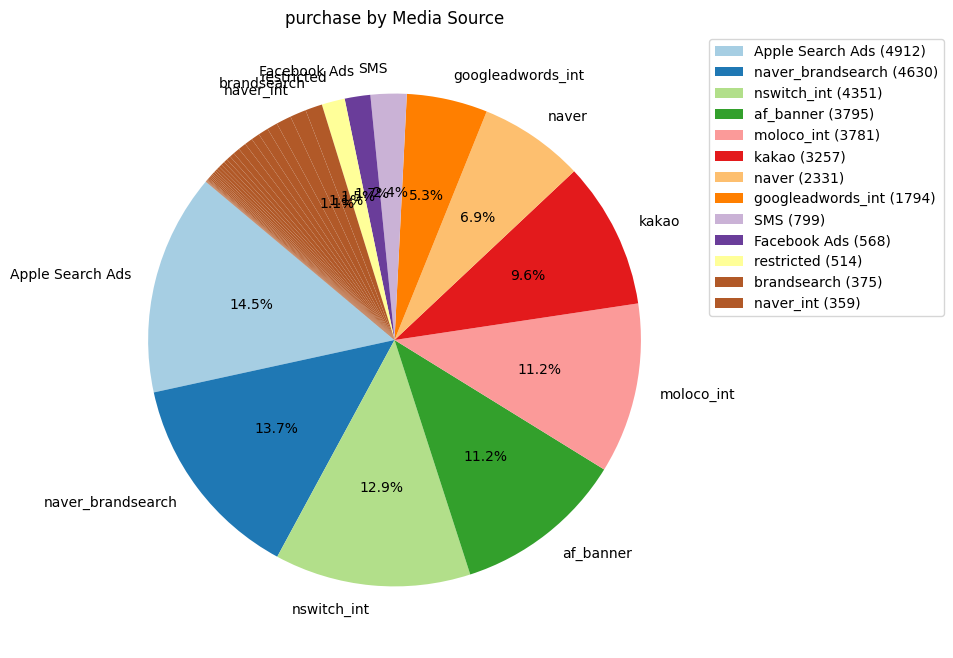

In [21]:
import matplotlib.pyplot as plt


# Event Name이 'install'인 것만 필터링
app_purchase_df = appsflyer_df[appsflyer_df['Event Name'] == 'af_purchase']

# Media Source 별로 설치 수 계산
purchase_counts_by_media_source = app_purchase_df['Media Source'].value_counts()

# 비율 계산
total_purchase = purchase_counts_by_media_source.sum()
purchase_percentages = purchase_counts_by_media_source / total_purchase * 100

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))

def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct >= 1 else ''

# 1% 미만인 항목 필터링
labels = purchase_counts_by_media_source.index
sizes = purchase_counts_by_media_source.values
colors = plt.cm.Paired(range(len(purchase_counts_by_media_source)))

# 1% 이상인 항목만 레이블 표시
wedges, texts, autotexts = ax.pie(
    sizes,
    # 깔끔하게 뽑기위해 텍스트 레이블 중 1% 미만인 항목의 레이블을 우선 제거
    labels=[label if percentage >= 1 else '' for label, percentage in zip(labels, purchase_percentages)],
    autopct=autopct_format,
    startangle=140,
    colors=colors
)
ax.set_title('purchase by Media Source')

# 범례 추가
plt.legend(
    labels=[f'{label} ({count})' for label, count, percentage in zip(labels, sizes, purchase_percentages) if percentage >= 1],
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

plt.show()

#### Apple channel 에서 구매가 가장 많이 일어났다고 볼 수 있다.

### Media 별로 install 횟수 시각화

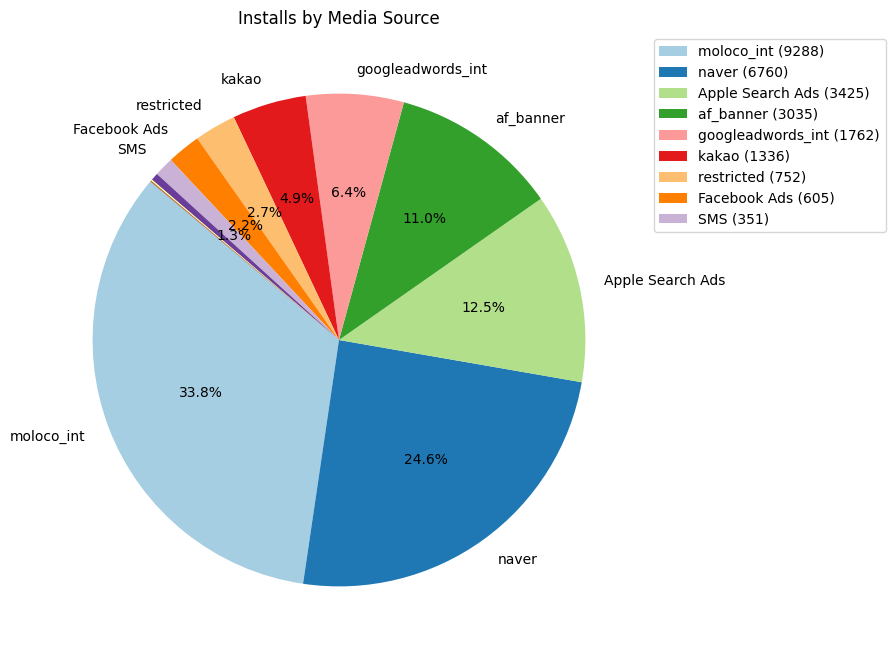

In [22]:
import matplotlib.pyplot as plt

# Event Name이 'install'인 것만 필터링
install_df = appsflyer_df[appsflyer_df['Event Name'] == 'install']

# Media Source 별로 설치 수 계산
install_counts_by_media_source = install_df['Media Source'].value_counts()

# 비율 계산
total_installs = install_counts_by_media_source.sum()
install_percentages = install_counts_by_media_source / total_installs * 100

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))

# 1% 미만인 항목 필터링
def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct >= 1 else ''

labels = install_counts_by_media_source.index
sizes = install_counts_by_media_source.values
colors = plt.cm.Paired(range(len(install_counts_by_media_source)))

# 1% 이상인 항목만 레이블 표시
wedges, texts, autotexts = ax.pie(
    sizes,
    # 깔끔하게 뽑기위해 텍스트 레이블 중 1% 미만인 항목의 레이블을 우선 제거
    labels=[label if percentage >= 1 else '' for label, percentage in zip(labels, install_percentages)],
    autopct=autopct_format,
    startangle=140,
    colors=colors
)
ax.set_title('Installs by Media Source')

# 범례 추가
plt.legend(
    labels=[f'{label} ({count})' for label, count, percentage in zip(labels, sizes, install_percentages) if percentage >= 1],
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

plt.show()

#### moloco 채널과 naver 채널에서 50%가 넘는 사용자가 자사의 앱을 설치하고 있음을 확인할 수 있다.

## Media Source & Campaign별 Metric 비교 차트
## Install to Complete Registration CVR vs Complete Registration to Purchase CVR)

- Step1. Media 별로 install 수 구하고 complete Registration 구하고 CVR 구하기
- Step2. Media 별로 Purchase를 구해서 Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR) 구하기
- Step3. 위에서 구한 데이터프레임 (install, registration, purchase)을 병합해서 시각화하기

In [23]:
#Media Source 별로 그룹화하여 install 횟수 계산 (위에서 구한 install_df를 활용)
install_count_by_Media_Source = install_df.groupby('Media Source').size().reset_index(name='Install Count')

#Media 별 complete Registration 구하기
com_registration_df = appsflyer_df[ appsflyer_df['Event Name'] == 'af_complete_registration']
registration_count_by_Media_Source = com_registration_df.groupby('Media Source').size().reset_index(name='complete registration Count')

#Media 별 af_purchase 구하기
purchase_df = appsflyer_df[ appsflyer_df['Event Name'] == 'af_purchase']
purchase_count_by_Media_Source = purchase_df.groupby('Media Source').size().reset_index(name='Purchase Count')


# Media 별로 install to complete Registration CVR 계산하기

# install_count_by_Media_Source 와 registration_count_by_Media_Source 병합
merged_Media_df = pd.merge(install_count_by_Media_Source, registration_count_by_Media_Source, on='Media Source')

# 병합된 데이터프레임과 purchase_count_by_Media_Source 병합
merged_Media_df = pd.merge(merged_Media_df, purchase_count_by_Media_Source, on='Media Source')
merged_Media_df['Install_to_Registration_CVR'] = merged_Media_df['complete registration Count'] / merged_Media_df['Install Count']
merged_Media_df['Registration_to_Purchase_CVR'] = merged_Media_df['Purchase Count'] / merged_Media_df['complete registration Count']
# 결과 확인
print(merged_Media_df)

         Media Source  Install Count  complete registration Count  \
0                ASUM              1                           24   
1    Apple Search Ads           3425                         1531   
2        Facebook Ads            605                          385   
3                 SMS            351                            8   
4           af_banner           3035                         1595   
5          elevatorad              3                            1   
6       elevatorad_QR             18                            5   
7   googleadwords_int           1762                          749   
8               kakao           1336                          578   
9          moloco_int           9288                         3190   
10              naver           6760                         2877   
11  naver_brandsearch             23                          216   
12         restricted            752                          365   
13    store_promotion            1

- 시각화

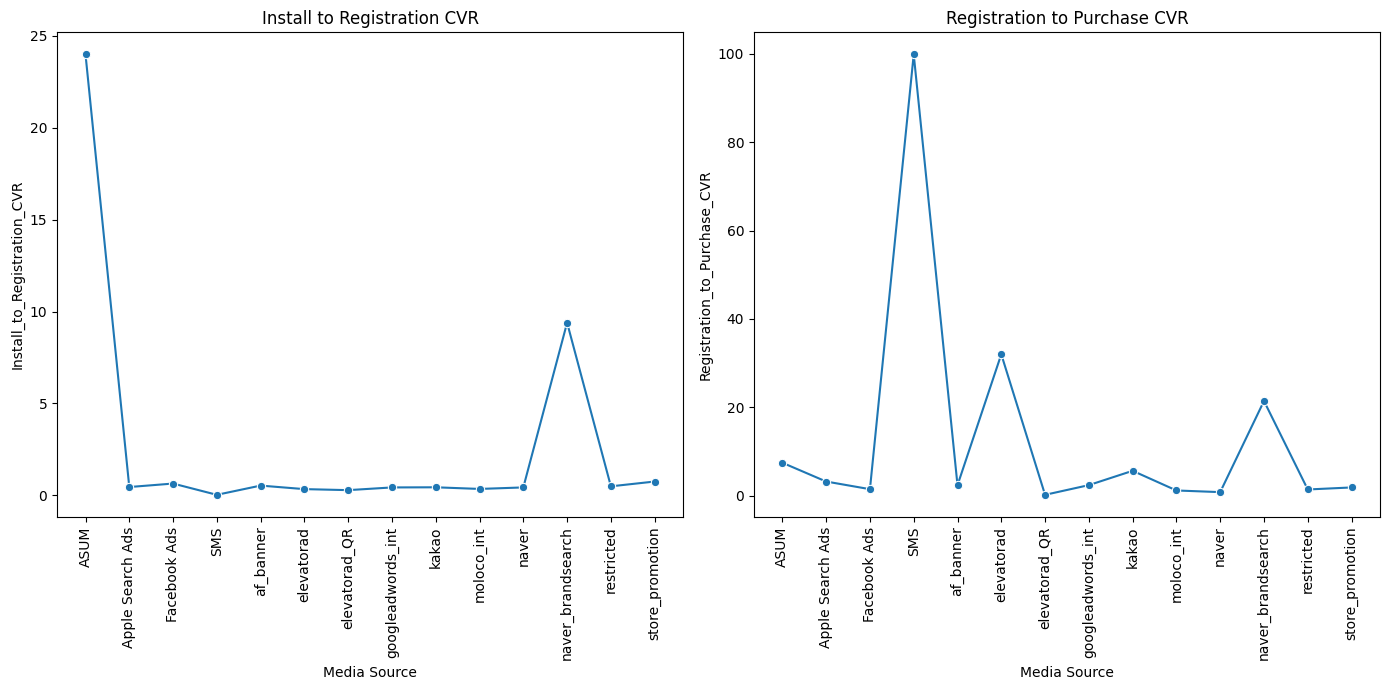

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(14, 7))

# Install_to_Registration_CVR 시각화
plt.subplot(1, 2, 1)
sns.lineplot(data=merged_Media_df, x='Media Source', y='Install_to_Registration_CVR', marker='o')
plt.title('Install to Registration CVR')
plt.xticks(rotation=90)

# Registration_to_Purchase_CVR 시각화
plt.subplot(1, 2, 2)
sns.lineplot(data=merged_Media_df, x='Media Source', y='Registration_to_Purchase_CVR', marker='o')
plt.title('Registration to Purchase CVR')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- 한 그래프에 합쳐서 그려보기

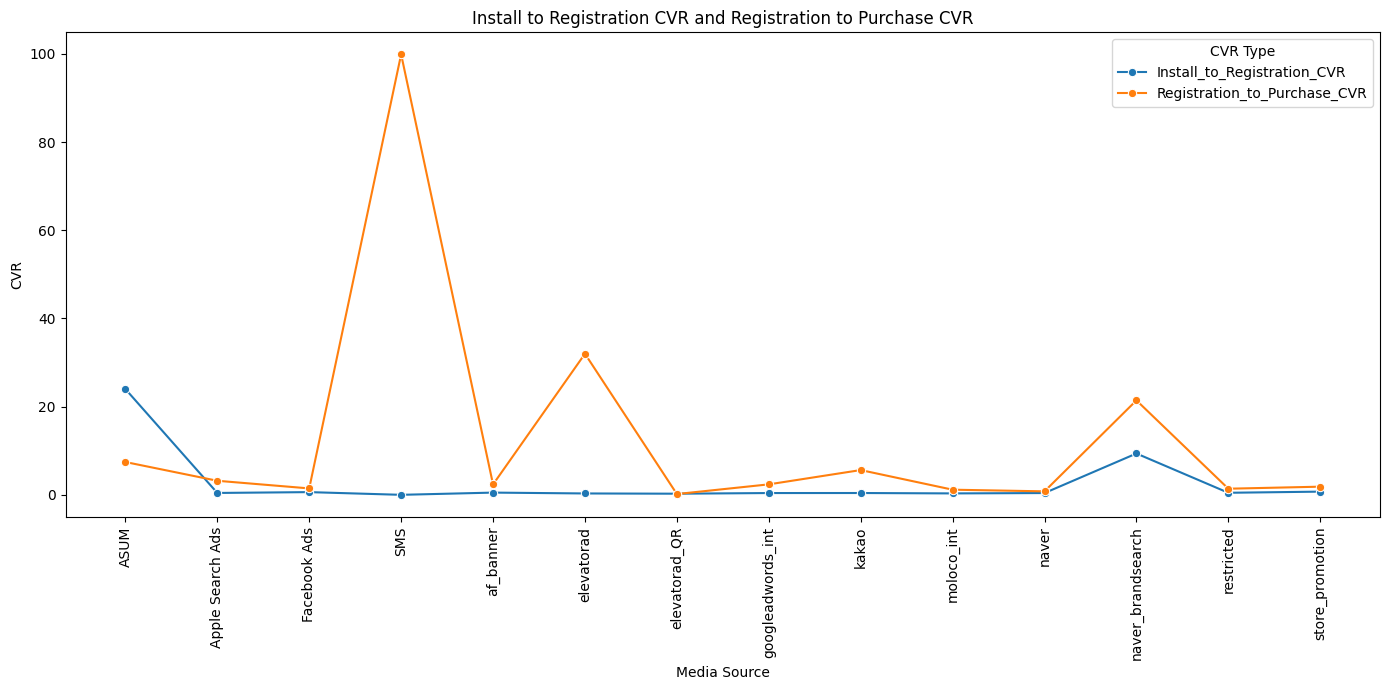

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 두 전환율을 하나의 데이터프레임으로 변형
melted_df = merged_Media_df.melt(id_vars=['Media Source'],
                                 value_vars=['Install_to_Registration_CVR', 'Registration_to_Purchase_CVR'],
                                 var_name='CVR Type', value_name='CVR')

# 시각화
plt.figure(figsize=(14, 7))

# 한 그래프에 두 전환율 그리기
sns.lineplot(data=melted_df, x='Media Source', y='CVR', hue='CVR Type', marker='o')

plt.title('Install to Registration CVR and Registration to Purchase CVR')
plt.xticks(rotation=90)
plt.legend(title='CVR Type')
plt.tight_layout()
plt.show()

## 일별 Cost 와 Purchase 1회당 광고 비용 (CPA(Purchase)) 한 그래프에 나타내기

- 애플, 모로코, 트위터 데이터프레임에서 Date와 각 비용 컬럼만 뽑아서 concat 하고 변수명은 cost로 통일하기

- 트위터만 date 형식이 달라 통일시켜주기 2023-xx-xx 포맷으로

In [26]:
from datetime import datetime

apple_ad_cost_df = apple_adchannel_df[['date','localSpend']].copy()
moloco_ad_cost_df = moloco_adchannel_df[['date','cost']].copy()
twitter_ad_cost_df =  twitter_adchannel_df[['date','billed_charge']].copy()

#트위터의 date 컬럼을 원하는 형식으로 변환
twitter_ad_cost_df.loc['date'] = twitter_ad_cost_df['date'].str.slice(0, 10)


apple_ad_cost_df.rename(columns={'localSpend' : 'cost'}, inplace=True)
twitter_ad_cost_df.rename(columns={'billed_charge' : 'cost'}, inplace=True)

#콘캣해서 하나의 데이터프레임으로 만들기
total_ad_cost_df = pd.concat([apple_ad_cost_df, moloco_ad_cost_df, twitter_ad_cost_df], axis=0, ignore_index=True)
total_ad_cost_df

,date,cost
0,2023-01-16,1434.920000
1,2023-01-16,5714.940000
2,2023-01-16,0.000000
3,2023-01-16,25791.450000
4,2023-01-16,0.000000
...,...,...
368,2023-01-14T00:00:00+09:00,93656.127774
369,2023-01-15T00:00:00+09:00,94371.983547
370,2023-01-16T00:00:00+09:00,94703.181985
371,2023-01-17T00:00:00+09:00,93906.912193


- groupby 해서 date별로 묶어주기

In [27]:
# DataFrame을 날짜로 그룹화하고 'cost'를 합산
total_ad_cost_group_df = total_ad_cost_df.groupby('date').sum()

# 결과 DataFrame을 얻기 위해 인덱스 재설정
total_ad_cost_group_df = total_ad_cost_group_df.reset_index()

- appsflyer_df 의 'Event Time' 컬럼을 2023-01-xx 포맷으로 만든 후 그룹화 하여 일별 구매횟수를 구하기
- 일별 CPA를 구하기 위해 구매횟수를 가진 프레임과 광고비용을 가진 프레임을 병합하기
- 일별 CPA = 일별_광고_비용 / 일 구매수

In [28]:
#Event Time컬럼을 '2023-01-xx'포맷으로 변환
appsflyer_df['Event Time'] = appsflyer_df['Event Time'].str.slice(0, 10)
#Event Name이 af_purchase인 것만 구하기
appsflyer_purchase_df = appsflyer_df[appsflyer_df['Event Name'] == 'af_purchase']

# 날짜별로 그룹화하여 구매 횟수 계산
purchase_count_by_date = appsflyer_purchase_df.groupby('Event Time').size().reset_index(name='Purchase Count')

# 일별 CPA 계산
# appsflyer_df와 total_ad_cost_group_df를 병합하여 구매당 비용 계산
merged_df = pd.merge(purchase_count_by_date, total_ad_cost_group_df, left_on='Event Time', right_on='date')
merged_df['CPA'] = merged_df['cost'] / merged_df['Purchase Count']

# 결과 확인
print(merged_df)

   Event Time  Purchase Count        date          cost        CPA
0  2023-01-10           17928  2023-01-10  1.420311e+06  79.223071
1  2023-01-11           18777  2023-01-11  1.459501e+06  77.728117
2  2023-01-12           17518  2023-01-12  1.580552e+06  90.224457
3  2023-01-13           19017  2023-01-13  1.883618e+06  99.049186
4  2023-01-14           24379  2023-01-14  1.837074e+06  75.354789
5  2023-01-15           23394  2023-01-15  2.102575e+06  89.876686
6  2023-01-16           24468  2023-01-16  1.570999e+06  64.206260
7  2023-01-17           23214  2023-01-17  1.541169e+06  66.389628


- 시각화

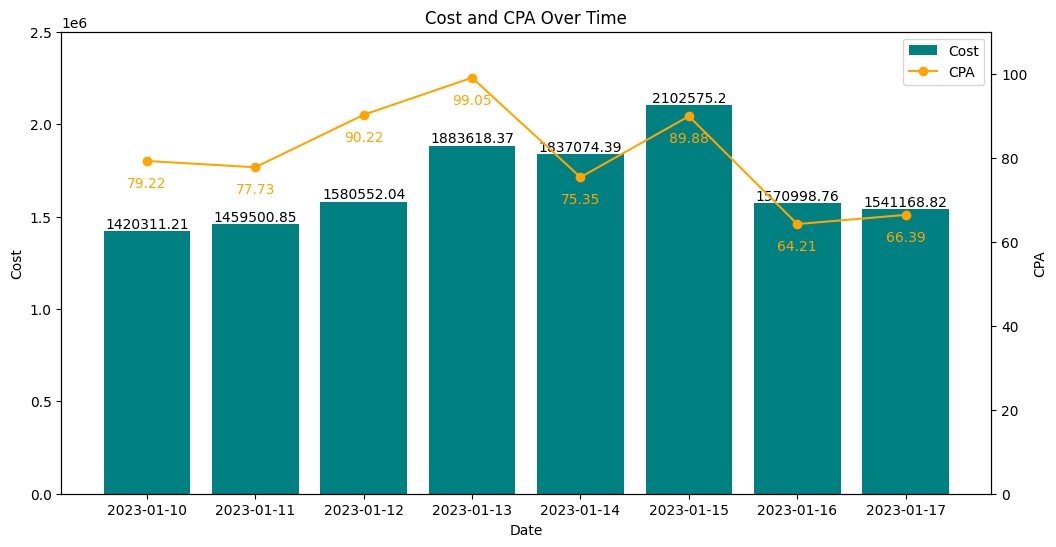

In [29]:
import matplotlib.pyplot as plt

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대 그래프 (Cost)
ax1.bar(merged_df['date'], merged_df['cost'], color='teal', label='Cost')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cost')
ax1.set_ylim(0, 2.5e+06)
ax1.set_title('Cost and CPA Over Time')

# 막대 위에 값 표시
for i in range(len(merged_df)):
    ax1.text(i, merged_df['cost'][i] + 20, round(merged_df['cost'][i], 2), ha='center', va='bottom')

# 꺾은선 그래프 (CPA)
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['CPA'], color='orange', marker='o', label='CPA')
ax2.set_ylabel('CPA')
ax2.set_ylim(0, 110)

# 꺾은선 위에 값 표시
for i in range(len(merged_df)):
    ax2.text(i, merged_df['CPA'][i] - 7, round(merged_df['CPA'][i], 2), ha='center', va='bottom', color='orange')

# 범례 추가
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# 그래프 보여주기
plt.show()

# Summary 데이터

- Install 유저 수
- Complete Registration 유저 수
- Purchase 수
- Purchase한 유저 수
- Install to Complete Registration 전환율 (Install to Complete Registration CVR)
- Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)
- Install 한 유저 1명당 광고 비용 (CAC(Install))
- Purchase 1회당 광고 비용 (CPA(Purchase))
- Complete Registration 한 유저 1명당 광고 비용 (CAC(Signup))
- Purchase 한 유저 1명당 광고 비용 (CAC(Purchase))
- impressions  (twitter + moloco + apple 의 impressions 합친 값)
- click( 트위터 + 모로코 + 애플의 taps)
- login 횟수
- 총 광고비용


In [30]:
#impressions 계산
impressions = twitter_adchannel_df['impressions'].sum() + moloco_adchannel_df['impressions'].sum() + apple_adchannel_df['impressions'].sum()
#click 계산
click = twitter_adchannel_df['clicks'].sum() + moloco_adchannel_df['clicks'].sum() + apple_adchannel_df['taps'].sum()
#Login 횟수 계산
Login = appsflyer_df[appsflyer_df['Event Name'] == 'af_login'].shape[0]

In [31]:
print('Install 유저수 :', install_num)
print('Complete Registration 유저수:', complete_registration_num)
print('Purchase 수 :', purchase_num)
print('Purchase 한 유저수 :', purchase_user_num)
print('Install to Complete Registration 전환율 CVR(소수점 넷째자리 반올림) :', round(complete_registration_num / install_num,4))
print('Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR) :', purchase_user_num / complete_registration_num)
print(f"Install 한 유저 1명당 광고 비용 (CAC(Install)): {CAC_install}")
print(f"Purchase 1회당 광고 비용 (CPA(Purchase)): {CPA_purchase}")
print(f"Complete Registration 한 유저 1명당 광고 비용 (CAC(Signup)): {CAC_signup}")
print('Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)(소수점 넷째자리 반올림) :', round(purchase_user_num / complete_registration_num,4))
print(f"Purchase 한 유저 1명당 광고 비용 (CAC(Purchase)): {CAC_purchase}")
print('impressions:', impressions)
print('click:', click)
print('Login:', Login)
print(f"총 광고비용: {total_ad_cost:.2f}")

#소수점 1자리까지만 해서 가져가기
summary = {
    'Install 유저수': [install_num],
    'Complete Registration 유저수': [complete_registration_num],
    'Purchase 수': [purchase_num],
    'Purchase 한 유저수': [purchase_user_num],
    'Install to Complete Registration 전환율 CVR': [round((complete_registration_num / install_num), 2)],
    'Complete Registration to Purchase 전환율': [round((purchase_user_num / complete_registration_num), 2)],
    'Install 한 유저 1명당 광고 비용 (CAC(Install))': [round(CAC_install,2)],
    'Purchase 1회당 광고 비용 (CPA(Purchase))': [round(CPA_purchase,2)],
    'Complete Registration 한 유저 1명당 광고 비용 (CAC(Signup))': [round(CAC_signup,2)],
    'Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)': [round((purchase_user_num / complete_registration_num), 2)],
    'Purchase 한 유저 1명당 광고 비용 (CAC(Purchase))': [round(CAC_purchase,2)],
    'impressions': [impressions],
    'click': [click],
    'Login': [Login],
    '총 광고비용': [round(total_ad_cost,2)]
}

#print(summary)

Install 유저수 : 85121
Complete Registration 유저수: 33795
Purchase 수 : 168695
Purchase 한 유저수 : 125752
Install to Complete Registration 전환율 CVR(소수점 넷째자리 반올림) : 0.397
Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR) : 3.7210238200917294
Install 한 유저 1명당 광고 비용 (CAC(Install)): 166.22328399704887
Purchase 1회당 광고 비용 (CPA(Purchase)): 83.87380869090843
Complete Registration 한 유저 1명당 광고 비용 (CAC(Signup)): 418.6741
Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)(소수점 넷째자리 반올림) : 3.721
Purchase 한 유저 1명당 광고 비용 (CAC(Purchase)): 112.51584195172083
impressions: 47714927.0
click: 66704.0
Login: 1805224
총 광고비용: 14149092.16


- csv 추출

In [ ]:
# summary_df = pd.DataFrame(summary)
# summary_df.to_csv('summary_data.csv', index=False)